In [2]:
import sys
import torch
sys.path.append('cocoapi\PythonAPI')
from pycocotools.coco import COCO
from data_loader import get_loader
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
# TODO #1: Define a transform to pre-process the testing images.
transform_test = transforms.Compose([ 
    transforms.Resize(256),                          
    transforms.CenterCrop(224),                             
    transforms.ToTensor(),                           
    transforms.Normalize((0.485, 0.456, 0.406),      
                         (0.229, 0.224, 0.225))])

#-#-#-# Do NOT modify the code below this line. #-#-#-#
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Create the data loader.
data_loader = get_loader(transform=transform_test,    
                         mode='test')
vocab_size = len(data_loader.dataset.vocab)

Vocabulary successfully loaded from vocab.pkl file!


In [3]:
from PIL import Image

def clean_sentence(output):
    sentence = ""
    for idx in output:
        if idx == 0:
            continue
        if idx == 1:
            break
        word = data_loader.dataset.vocab.idx2word[idx]
        sentence = sentence + word + ' '
        
    return sentence

def fetch_image(file_name):
    orig_image = Image.open(file_name).convert('RGB')
    plt.imshow(np.squeeze(orig_image))
    plt.title('Sample Image')
    plt.show()
    transform_test = transforms.Compose([ 
        transforms.Resize(256),                          
        transforms.CenterCrop(224),                             
        transforms.ToTensor(),                           
        transforms.Normalize((0.485, 0.456, 0.406),      
                             (0.229, 0.224, 0.225))])
    input_image = transform_test(orig_image)
    return orig_image, input_image

def generate_caption(input_image):
    print(input_image.shape)
    features = encoder(input_image).unsqueeze(1)
    features.to(device)
#     print(features.shape)
    output = decoder.sample(features)    
    sentence = clean_sentence(output)
    print(sentence)

In [8]:
%load_ext autoreload
# %autoreload 2

import os
import torch
from training_incremental_model import Incremental_EncoderCNN, Incremental_DecoderRNN

# TODO #2: Specify the saved models to load.
encoder_file_8_layers = 'incremental_comparative_encoder-1_four_blocks.pkl'
decoder_file_8_layers = 'incremental_comparitive_decoder-1_four_blocks.pkl'

embed_size = 512
hidden_size = 512


encoder = Incremental_EncoderCNN(embed_size)
encoder.eval()
decoder = Incremental_DecoderRNN(embed_size, hidden_size, vocab_size)
decoder.eval()



encoder.load_state_dict(torch.load(os.path.join(os.getcwd(),'models', encoder_file_8_layers)))
decoder.load_state_dict(torch.load(os.path.join(os.getcwd(),'models', decoder_file_8_layers)))

encoder.to(device)
decoder.to(device)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
8 1024


RuntimeError: Error(s) in loading state_dict for EncoderCNN:
	Missing key(s) in state_dict: "resnet.0.weight", "resnet.1.weight", "resnet.1.bias", "resnet.1.running_mean", "resnet.1.running_var", "resnet.4.0.conv1.weight", "resnet.4.0.bn1.weight", "resnet.4.0.bn1.bias", "resnet.4.0.bn1.running_mean", "resnet.4.0.bn1.running_var", "resnet.4.0.conv2.weight", "resnet.4.0.bn2.weight", "resnet.4.0.bn2.bias", "resnet.4.0.bn2.running_mean", "resnet.4.0.bn2.running_var", "resnet.4.0.conv3.weight", "resnet.4.0.bn3.weight", "resnet.4.0.bn3.bias", "resnet.4.0.bn3.running_mean", "resnet.4.0.bn3.running_var", "resnet.4.0.downsample.0.weight", "resnet.4.0.downsample.1.weight", "resnet.4.0.downsample.1.bias", "resnet.4.0.downsample.1.running_mean", "resnet.4.0.downsample.1.running_var", "resnet.4.1.conv1.weight", "resnet.4.1.bn1.weight", "resnet.4.1.bn1.bias", "resnet.4.1.bn1.running_mean", "resnet.4.1.bn1.running_var", "resnet.4.1.conv2.weight", "resnet.4.1.bn2.weight", "resnet.4.1.bn2.bias", "resnet.4.1.bn2.running_mean", "resnet.4.1.bn2.running_var", "resnet.4.1.conv3.weight", "resnet.4.1.bn3.weight", "resnet.4.1.bn3.bias", "resnet.4.1.bn3.running_mean", "resnet.4.1.bn3.running_var", "resnet.4.2.conv1.weight", "resnet.4.2.bn1.weight", "resnet.4.2.bn1.bias", "resnet.4.2.bn1.running_mean", "resnet.4.2.bn1.running_var", "resnet.4.2.conv2.weight", "resnet.4.2.bn2.weight", "resnet.4.2.bn2.bias", "resnet.4.2.bn2.running_mean", "resnet.4.2.bn2.running_var", "resnet.4.2.conv3.weight", "resnet.4.2.bn3.weight", "resnet.4.2.bn3.bias", "resnet.4.2.bn3.running_mean", "resnet.4.2.bn3.running_var", "resnet.5.0.conv1.weight", "resnet.5.0.bn1.weight", "resnet.5.0.bn1.bias", "resnet.5.0.bn1.running_mean", "resnet.5.0.bn1.running_var", "resnet.5.0.conv2.weight", "resnet.5.0.bn2.weight", "resnet.5.0.bn2.bias", "resnet.5.0.bn2.running_mean", "resnet.5.0.bn2.running_var", "resnet.5.0.conv3.weight", "resnet.5.0.bn3.weight", "resnet.5.0.bn3.bias", "resnet.5.0.bn3.running_mean", "resnet.5.0.bn3.running_var", "resnet.5.0.downsample.0.weight", "resnet.5.0.downsample.1.weight", "resnet.5.0.downsample.1.bias", "resnet.5.0.downsample.1.running_mean", "resnet.5.0.downsample.1.running_var", "resnet.5.1.conv1.weight", "resnet.5.1.bn1.weight", "resnet.5.1.bn1.bias", "resnet.5.1.bn1.running_mean", "resnet.5.1.bn1.running_var", "resnet.5.1.conv2.weight", "resnet.5.1.bn2.weight", "resnet.5.1.bn2.bias", "resnet.5.1.bn2.running_mean", "resnet.5.1.bn2.running_var", "resnet.5.1.conv3.weight", "resnet.5.1.bn3.weight", "resnet.5.1.bn3.bias", "resnet.5.1.bn3.running_mean", "resnet.5.1.bn3.running_var", "resnet.5.2.conv1.weight", "resnet.5.2.bn1.weight", "resnet.5.2.bn1.bias", "resnet.5.2.bn1.running_mean", "resnet.5.2.bn1.running_var", "resnet.5.2.conv2.weight", "resnet.5.2.bn2.weight", "resnet.5.2.bn2.bias", "resnet.5.2.bn2.running_mean", "resnet.5.2.bn2.running_var", "resnet.5.2.conv3.weight", "resnet.5.2.bn3.weight", "resnet.5.2.bn3.bias", "resnet.5.2.bn3.running_mean", "resnet.5.2.bn3.running_var", "resnet.5.3.conv1.weight", "resnet.5.3.bn1.weight", "resnet.5.3.bn1.bias", "resnet.5.3.bn1.running_mean", "resnet.5.3.bn1.running_var", "resnet.5.3.conv2.weight", "resnet.5.3.bn2.weight", "resnet.5.3.bn2.bias", "resnet.5.3.bn2.running_mean", "resnet.5.3.bn2.running_var", "resnet.5.3.conv3.weight", "resnet.5.3.bn3.weight", "resnet.5.3.bn3.bias", "resnet.5.3.bn3.running_mean", "resnet.5.3.bn3.running_var", "resnet.5.4.conv1.weight", "resnet.5.4.bn1.weight", "resnet.5.4.bn1.bias", "resnet.5.4.bn1.running_mean", "resnet.5.4.bn1.running_var", "resnet.5.4.conv2.weight", "resnet.5.4.bn2.weight", "resnet.5.4.bn2.bias", "resnet.5.4.bn2.running_mean", "resnet.5.4.bn2.running_var", "resnet.5.4.conv3.weight", "resnet.5.4.bn3.weight", "resnet.5.4.bn3.bias", "resnet.5.4.bn3.running_mean", "resnet.5.4.bn3.running_var", "resnet.5.5.conv1.weight", "resnet.5.5.bn1.weight", "resnet.5.5.bn1.bias", "resnet.5.5.bn1.running_mean", "resnet.5.5.bn1.running_var", "resnet.5.5.conv2.weight", "resnet.5.5.bn2.weight", "resnet.5.5.bn2.bias", "resnet.5.5.bn2.running_mean", "resnet.5.5.bn2.running_var", "resnet.5.5.conv3.weight", "resnet.5.5.bn3.weight", "resnet.5.5.bn3.bias", "resnet.5.5.bn3.running_mean", "resnet.5.5.bn3.running_var", "resnet.5.6.conv1.weight", "resnet.5.6.bn1.weight", "resnet.5.6.bn1.bias", "resnet.5.6.bn1.running_mean", "resnet.5.6.bn1.running_var", "resnet.5.6.conv2.weight", "resnet.5.6.bn2.weight", "resnet.5.6.bn2.bias", "resnet.5.6.bn2.running_mean", "resnet.5.6.bn2.running_var", "resnet.5.6.conv3.weight", "resnet.5.6.bn3.weight", "resnet.5.6.bn3.bias", "resnet.5.6.bn3.running_mean", "resnet.5.6.bn3.running_var", "resnet.5.7.conv1.weight", "resnet.5.7.bn1.weight", "resnet.5.7.bn1.bias", "resnet.5.7.bn1.running_mean", "resnet.5.7.bn1.running_var", "resnet.5.7.conv2.weight", "resnet.5.7.bn2.weight", "resnet.5.7.bn2.bias", "resnet.5.7.bn2.running_mean", "resnet.5.7.bn2.running_var", "resnet.5.7.conv3.weight", "resnet.5.7.bn3.weight", "resnet.5.7.bn3.bias", "resnet.5.7.bn3.running_mean", "resnet.5.7.bn3.running_var", "resnet.6.0.conv1.weight", "resnet.6.0.bn1.weight", "resnet.6.0.bn1.bias", "resnet.6.0.bn1.running_mean", "resnet.6.0.bn1.running_var", "resnet.6.0.conv2.weight", "resnet.6.0.bn2.weight", "resnet.6.0.bn2.bias", "resnet.6.0.bn2.running_mean", "resnet.6.0.bn2.running_var", "resnet.6.0.conv3.weight", "resnet.6.0.bn3.weight", "resnet.6.0.bn3.bias", "resnet.6.0.bn3.running_mean", "resnet.6.0.bn3.running_var", "resnet.6.0.downsample.0.weight", "resnet.6.0.downsample.1.weight", "resnet.6.0.downsample.1.bias", "resnet.6.0.downsample.1.running_mean", "resnet.6.0.downsample.1.running_var", "resnet.6.1.conv1.weight", "resnet.6.1.bn1.weight", "resnet.6.1.bn1.bias", "resnet.6.1.bn1.running_mean", "resnet.6.1.bn1.running_var", "resnet.6.1.conv2.weight", "resnet.6.1.bn2.weight", "resnet.6.1.bn2.bias", "resnet.6.1.bn2.running_mean", "resnet.6.1.bn2.running_var", "resnet.6.1.conv3.weight", "resnet.6.1.bn3.weight", "resnet.6.1.bn3.bias", "resnet.6.1.bn3.running_mean", "resnet.6.1.bn3.running_var", "resnet.6.2.conv1.weight", "resnet.6.2.bn1.weight", "resnet.6.2.bn1.bias", "resnet.6.2.bn1.running_mean", "resnet.6.2.bn1.running_var", "resnet.6.2.conv2.weight", "resnet.6.2.bn2.weight", "resnet.6.2.bn2.bias", "resnet.6.2.bn2.running_mean", "resnet.6.2.bn2.running_var", "resnet.6.2.conv3.weight", "resnet.6.2.bn3.weight", "resnet.6.2.bn3.bias", "resnet.6.2.bn3.running_mean", "resnet.6.2.bn3.running_var", "resnet.6.3.conv1.weight", "resnet.6.3.bn1.weight", "resnet.6.3.bn1.bias", "resnet.6.3.bn1.running_mean", "resnet.6.3.bn1.running_var", "resnet.6.3.conv2.weight", "resnet.6.3.bn2.weight", "resnet.6.3.bn2.bias", "resnet.6.3.bn2.running_mean", "resnet.6.3.bn2.running_var", "resnet.6.3.conv3.weight", "resnet.6.3.bn3.weight", "resnet.6.3.bn3.bias", "resnet.6.3.bn3.running_mean", "resnet.6.3.bn3.running_var", "resnet.6.4.conv1.weight", "resnet.6.4.bn1.weight", "resnet.6.4.bn1.bias", "resnet.6.4.bn1.running_mean", "resnet.6.4.bn1.running_var", "resnet.6.4.conv2.weight", "resnet.6.4.bn2.weight", "resnet.6.4.bn2.bias", "resnet.6.4.bn2.running_mean", "resnet.6.4.bn2.running_var", "resnet.6.4.conv3.weight", "resnet.6.4.bn3.weight", "resnet.6.4.bn3.bias", "resnet.6.4.bn3.running_mean", "resnet.6.4.bn3.running_var", "resnet.6.5.conv1.weight", "resnet.6.5.bn1.weight", "resnet.6.5.bn1.bias", "resnet.6.5.bn1.running_mean", "resnet.6.5.bn1.running_var", "resnet.6.5.conv2.weight", "resnet.6.5.bn2.weight", "resnet.6.5.bn2.bias", "resnet.6.5.bn2.running_mean", "resnet.6.5.bn2.running_var", "resnet.6.5.conv3.weight", "resnet.6.5.bn3.weight", "resnet.6.5.bn3.bias", "resnet.6.5.bn3.running_mean", "resnet.6.5.bn3.running_var", "resnet.6.6.conv1.weight", "resnet.6.6.bn1.weight", "resnet.6.6.bn1.bias", "resnet.6.6.bn1.running_mean", "resnet.6.6.bn1.running_var", "resnet.6.6.conv2.weight", "resnet.6.6.bn2.weight", "resnet.6.6.bn2.bias", "resnet.6.6.bn2.running_mean", "resnet.6.6.bn2.running_var", "resnet.6.6.conv3.weight", "resnet.6.6.bn3.weight", "resnet.6.6.bn3.bias", "resnet.6.6.bn3.running_mean", "resnet.6.6.bn3.running_var", "resnet.6.7.conv1.weight", "resnet.6.7.bn1.weight", "resnet.6.7.bn1.bias", "resnet.6.7.bn1.running_mean", "resnet.6.7.bn1.running_var", "resnet.6.7.conv2.weight", "resnet.6.7.bn2.weight", "resnet.6.7.bn2.bias", "resnet.6.7.bn2.running_mean", "resnet.6.7.bn2.running_var", "resnet.6.7.conv3.weight", "resnet.6.7.bn3.weight", "resnet.6.7.bn3.bias", "resnet.6.7.bn3.running_mean", "resnet.6.7.bn3.running_var", "resnet.6.8.conv1.weight", "resnet.6.8.bn1.weight", "resnet.6.8.bn1.bias", "resnet.6.8.bn1.running_mean", "resnet.6.8.bn1.running_var", "resnet.6.8.conv2.weight", "resnet.6.8.bn2.weight", "resnet.6.8.bn2.bias", "resnet.6.8.bn2.running_mean", "resnet.6.8.bn2.running_var", "resnet.6.8.conv3.weight", "resnet.6.8.bn3.weight", "resnet.6.8.bn3.bias", "resnet.6.8.bn3.running_mean", "resnet.6.8.bn3.running_var", "resnet.6.9.conv1.weight", "resnet.6.9.bn1.weight", "resnet.6.9.bn1.bias", "resnet.6.9.bn1.running_mean", "resnet.6.9.bn1.running_var", "resnet.6.9.conv2.weight", "resnet.6.9.bn2.weight", "resnet.6.9.bn2.bias", "resnet.6.9.bn2.running_mean", "resnet.6.9.bn2.running_var", "resnet.6.9.conv3.weight", "resnet.6.9.bn3.weight", "resnet.6.9.bn3.bias", "resnet.6.9.bn3.running_mean", "resnet.6.9.bn3.running_var", "resnet.6.10.conv1.weight", "resnet.6.10.bn1.weight", "resnet.6.10.bn1.bias", "resnet.6.10.bn1.running_mean", "resnet.6.10.bn1.running_var", "resnet.6.10.conv2.weight", "resnet.6.10.bn2.weight", "resnet.6.10.bn2.bias", "resnet.6.10.bn2.running_mean", "resnet.6.10.bn2.running_var", "resnet.6.10.conv3.weight", "resnet.6.10.bn3.weight", "resnet.6.10.bn3.bias", "resnet.6.10.bn3.running_mean", "resnet.6.10.bn3.running_var", "resnet.6.11.conv1.weight", "resnet.6.11.bn1.weight", "resnet.6.11.bn1.bias", "resnet.6.11.bn1.running_mean", "resnet.6.11.bn1.running_var", "resnet.6.11.conv2.weight", "resnet.6.11.bn2.weight", "resnet.6.11.bn2.bias", "resnet.6.11.bn2.running_mean", "resnet.6.11.bn2.running_var", "resnet.6.11.conv3.weight", "resnet.6.11.bn3.weight", "resnet.6.11.bn3.bias", "resnet.6.11.bn3.running_mean", "resnet.6.11.bn3.running_var", "resnet.6.12.conv1.weight", "resnet.6.12.bn1.weight", "resnet.6.12.bn1.bias", "resnet.6.12.bn1.running_mean", "resnet.6.12.bn1.running_var", "resnet.6.12.conv2.weight", "resnet.6.12.bn2.weight", "resnet.6.12.bn2.bias", "resnet.6.12.bn2.running_mean", "resnet.6.12.bn2.running_var", "resnet.6.12.conv3.weight", "resnet.6.12.bn3.weight", "resnet.6.12.bn3.bias", "resnet.6.12.bn3.running_mean", "resnet.6.12.bn3.running_var", "resnet.6.13.conv1.weight", "resnet.6.13.bn1.weight", "resnet.6.13.bn1.bias", "resnet.6.13.bn1.running_mean", "resnet.6.13.bn1.running_var", "resnet.6.13.conv2.weight", "resnet.6.13.bn2.weight", "resnet.6.13.bn2.bias", "resnet.6.13.bn2.running_mean", "resnet.6.13.bn2.running_var", "resnet.6.13.conv3.weight", "resnet.6.13.bn3.weight", "resnet.6.13.bn3.bias", "resnet.6.13.bn3.running_mean", "resnet.6.13.bn3.running_var", "resnet.6.14.conv1.weight", "resnet.6.14.bn1.weight", "resnet.6.14.bn1.bias", "resnet.6.14.bn1.running_mean", "resnet.6.14.bn1.running_var", "resnet.6.14.conv2.weight", "resnet.6.14.bn2.weight", "resnet.6.14.bn2.bias", "resnet.6.14.bn2.running_mean", "resnet.6.14.bn2.running_var", "resnet.6.14.conv3.weight", "resnet.6.14.bn3.weight", "resnet.6.14.bn3.bias", "resnet.6.14.bn3.running_mean", "resnet.6.14.bn3.running_var", "resnet.6.15.conv1.weight", "resnet.6.15.bn1.weight", "resnet.6.15.bn1.bias", "resnet.6.15.bn1.running_mean", "resnet.6.15.bn1.running_var", "resnet.6.15.conv2.weight", "resnet.6.15.bn2.weight", "resnet.6.15.bn2.bias", "resnet.6.15.bn2.running_mean", "resnet.6.15.bn2.running_var", "resnet.6.15.conv3.weight", "resnet.6.15.bn3.weight", "resnet.6.15.bn3.bias", "resnet.6.15.bn3.running_mean", "resnet.6.15.bn3.running_var", "resnet.6.16.conv1.weight", "resnet.6.16.bn1.weight", "resnet.6.16.bn1.bias", "resnet.6.16.bn1.running_mean", "resnet.6.16.bn1.running_var", "resnet.6.16.conv2.weight", "resnet.6.16.bn2.weight", "resnet.6.16.bn2.bias", "resnet.6.16.bn2.running_mean", "resnet.6.16.bn2.running_var", "resnet.6.16.conv3.weight", "resnet.6.16.bn3.weight", "resnet.6.16.bn3.bias", "resnet.6.16.bn3.running_mean", "resnet.6.16.bn3.running_var", "resnet.6.17.conv1.weight", "resnet.6.17.bn1.weight", "resnet.6.17.bn1.bias", "resnet.6.17.bn1.running_mean", "resnet.6.17.bn1.running_var", "resnet.6.17.conv2.weight", "resnet.6.17.bn2.weight", "resnet.6.17.bn2.bias", "resnet.6.17.bn2.running_mean", "resnet.6.17.bn2.running_var", "resnet.6.17.conv3.weight", "resnet.6.17.bn3.weight", "resnet.6.17.bn3.bias", "resnet.6.17.bn3.running_mean", "resnet.6.17.bn3.running_var", "resnet.6.18.conv1.weight", "resnet.6.18.bn1.weight", "resnet.6.18.bn1.bias", "resnet.6.18.bn1.running_mean", "resnet.6.18.bn1.running_var", "resnet.6.18.conv2.weight", "resnet.6.18.bn2.weight", "resnet.6.18.bn2.bias", "resnet.6.18.bn2.running_mean", "resnet.6.18.bn2.running_var", "resnet.6.18.conv3.weight", "resnet.6.18.bn3.weight", "resnet.6.18.bn3.bias", "resnet.6.18.bn3.running_mean", "resnet.6.18.bn3.running_var", "resnet.6.19.conv1.weight", "resnet.6.19.bn1.weight", "resnet.6.19.bn1.bias", "resnet.6.19.bn1.running_mean", "resnet.6.19.bn1.running_var", "resnet.6.19.conv2.weight", "resnet.6.19.bn2.weight", "resnet.6.19.bn2.bias", "resnet.6.19.bn2.running_mean", "resnet.6.19.bn2.running_var", "resnet.6.19.conv3.weight", "resnet.6.19.bn3.weight", "resnet.6.19.bn3.bias", "resnet.6.19.bn3.running_mean", "resnet.6.19.bn3.running_var", "resnet.6.20.conv1.weight", "resnet.6.20.bn1.weight", "resnet.6.20.bn1.bias", "resnet.6.20.bn1.running_mean", "resnet.6.20.bn1.running_var", "resnet.6.20.conv2.weight", "resnet.6.20.bn2.weight", "resnet.6.20.bn2.bias", "resnet.6.20.bn2.running_mean", "resnet.6.20.bn2.running_var", "resnet.6.20.conv3.weight", "resnet.6.20.bn3.weight", "resnet.6.20.bn3.bias", "resnet.6.20.bn3.running_mean", "resnet.6.20.bn3.running_var", "resnet.6.21.conv1.weight", "resnet.6.21.bn1.weight", "resnet.6.21.bn1.bias", "resnet.6.21.bn1.running_mean", "resnet.6.21.bn1.running_var", "resnet.6.21.conv2.weight", "resnet.6.21.bn2.weight", "resnet.6.21.bn2.bias", "resnet.6.21.bn2.running_mean", "resnet.6.21.bn2.running_var", "resnet.6.21.conv3.weight", "resnet.6.21.bn3.weight", "resnet.6.21.bn3.bias", "resnet.6.21.bn3.running_mean", "resnet.6.21.bn3.running_var", "resnet.6.22.conv1.weight", "resnet.6.22.bn1.weight", "resnet.6.22.bn1.bias", "resnet.6.22.bn1.running_mean", "resnet.6.22.bn1.running_var", "resnet.6.22.conv2.weight", "resnet.6.22.bn2.weight", "resnet.6.22.bn2.bias", "resnet.6.22.bn2.running_mean", "resnet.6.22.bn2.running_var", "resnet.6.22.conv3.weight", "resnet.6.22.bn3.weight", "resnet.6.22.bn3.bias", "resnet.6.22.bn3.running_mean", "resnet.6.22.bn3.running_var", "resnet.6.23.conv1.weight", "resnet.6.23.bn1.weight", "resnet.6.23.bn1.bias", "resnet.6.23.bn1.running_mean", "resnet.6.23.bn1.running_var", "resnet.6.23.conv2.weight", "resnet.6.23.bn2.weight", "resnet.6.23.bn2.bias", "resnet.6.23.bn2.running_mean", "resnet.6.23.bn2.running_var", "resnet.6.23.conv3.weight", "resnet.6.23.bn3.weight", "resnet.6.23.bn3.bias", "resnet.6.23.bn3.running_mean", "resnet.6.23.bn3.running_var", "resnet.6.24.conv1.weight", "resnet.6.24.bn1.weight", "resnet.6.24.bn1.bias", "resnet.6.24.bn1.running_mean", "resnet.6.24.bn1.running_var", "resnet.6.24.conv2.weight", "resnet.6.24.bn2.weight", "resnet.6.24.bn2.bias", "resnet.6.24.bn2.running_mean", "resnet.6.24.bn2.running_var", "resnet.6.24.conv3.weight", "resnet.6.24.bn3.weight", "resnet.6.24.bn3.bias", "resnet.6.24.bn3.running_mean", "resnet.6.24.bn3.running_var", "resnet.6.25.conv1.weight", "resnet.6.25.bn1.weight", "resnet.6.25.bn1.bias", "resnet.6.25.bn1.running_mean", "resnet.6.25.bn1.running_var", "resnet.6.25.conv2.weight", "resnet.6.25.bn2.weight", "resnet.6.25.bn2.bias", "resnet.6.25.bn2.running_mean", "resnet.6.25.bn2.running_var", "resnet.6.25.conv3.weight", "resnet.6.25.bn3.weight", "resnet.6.25.bn3.bias", "resnet.6.25.bn3.running_mean", "resnet.6.25.bn3.running_var", "resnet.6.26.conv1.weight", "resnet.6.26.bn1.weight", "resnet.6.26.bn1.bias", "resnet.6.26.bn1.running_mean", "resnet.6.26.bn1.running_var", "resnet.6.26.conv2.weight", "resnet.6.26.bn2.weight", "resnet.6.26.bn2.bias", "resnet.6.26.bn2.running_mean", "resnet.6.26.bn2.running_var", "resnet.6.26.conv3.weight", "resnet.6.26.bn3.weight", "resnet.6.26.bn3.bias", "resnet.6.26.bn3.running_mean", "resnet.6.26.bn3.running_var", "resnet.6.27.conv1.weight", "resnet.6.27.bn1.weight", "resnet.6.27.bn1.bias", "resnet.6.27.bn1.running_mean", "resnet.6.27.bn1.running_var", "resnet.6.27.conv2.weight", "resnet.6.27.bn2.weight", "resnet.6.27.bn2.bias", "resnet.6.27.bn2.running_mean", "resnet.6.27.bn2.running_var", "resnet.6.27.conv3.weight", "resnet.6.27.bn3.weight", "resnet.6.27.bn3.bias", "resnet.6.27.bn3.running_mean", "resnet.6.27.bn3.running_var", "resnet.6.28.conv1.weight", "resnet.6.28.bn1.weight", "resnet.6.28.bn1.bias", "resnet.6.28.bn1.running_mean", "resnet.6.28.bn1.running_var", "resnet.6.28.conv2.weight", "resnet.6.28.bn2.weight", "resnet.6.28.bn2.bias", "resnet.6.28.bn2.running_mean", "resnet.6.28.bn2.running_var", "resnet.6.28.conv3.weight", "resnet.6.28.bn3.weight", "resnet.6.28.bn3.bias", "resnet.6.28.bn3.running_mean", "resnet.6.28.bn3.running_var", "resnet.6.29.conv1.weight", "resnet.6.29.bn1.weight", "resnet.6.29.bn1.bias", "resnet.6.29.bn1.running_mean", "resnet.6.29.bn1.running_var", "resnet.6.29.conv2.weight", "resnet.6.29.bn2.weight", "resnet.6.29.bn2.bias", "resnet.6.29.bn2.running_mean", "resnet.6.29.bn2.running_var", "resnet.6.29.conv3.weight", "resnet.6.29.bn3.weight", "resnet.6.29.bn3.bias", "resnet.6.29.bn3.running_mean", "resnet.6.29.bn3.running_var", "resnet.6.30.conv1.weight", "resnet.6.30.bn1.weight", "resnet.6.30.bn1.bias", "resnet.6.30.bn1.running_mean", "resnet.6.30.bn1.running_var", "resnet.6.30.conv2.weight", "resnet.6.30.bn2.weight", "resnet.6.30.bn2.bias", "resnet.6.30.bn2.running_mean", "resnet.6.30.bn2.running_var", "resnet.6.30.conv3.weight", "resnet.6.30.bn3.weight", "resnet.6.30.bn3.bias", "resnet.6.30.bn3.running_mean", "resnet.6.30.bn3.running_var", "resnet.6.31.conv1.weight", "resnet.6.31.bn1.weight", "resnet.6.31.bn1.bias", "resnet.6.31.bn1.running_mean", "resnet.6.31.bn1.running_var", "resnet.6.31.conv2.weight", "resnet.6.31.bn2.weight", "resnet.6.31.bn2.bias", "resnet.6.31.bn2.running_mean", "resnet.6.31.bn2.running_var", "resnet.6.31.conv3.weight", "resnet.6.31.bn3.weight", "resnet.6.31.bn3.bias", "resnet.6.31.bn3.running_mean", "resnet.6.31.bn3.running_var", "resnet.6.32.conv1.weight", "resnet.6.32.bn1.weight", "resnet.6.32.bn1.bias", "resnet.6.32.bn1.running_mean", "resnet.6.32.bn1.running_var", "resnet.6.32.conv2.weight", "resnet.6.32.bn2.weight", "resnet.6.32.bn2.bias", "resnet.6.32.bn2.running_mean", "resnet.6.32.bn2.running_var", "resnet.6.32.conv3.weight", "resnet.6.32.bn3.weight", "resnet.6.32.bn3.bias", "resnet.6.32.bn3.running_mean", "resnet.6.32.bn3.running_var", "resnet.6.33.conv1.weight", "resnet.6.33.bn1.weight", "resnet.6.33.bn1.bias", "resnet.6.33.bn1.running_mean", "resnet.6.33.bn1.running_var", "resnet.6.33.conv2.weight", "resnet.6.33.bn2.weight", "resnet.6.33.bn2.bias", "resnet.6.33.bn2.running_mean", "resnet.6.33.bn2.running_var", "resnet.6.33.conv3.weight", "resnet.6.33.bn3.weight", "resnet.6.33.bn3.bias", "resnet.6.33.bn3.running_mean", "resnet.6.33.bn3.running_var", "resnet.6.34.conv1.weight", "resnet.6.34.bn1.weight", "resnet.6.34.bn1.bias", "resnet.6.34.bn1.running_mean", "resnet.6.34.bn1.running_var", "resnet.6.34.conv2.weight", "resnet.6.34.bn2.weight", "resnet.6.34.bn2.bias", "resnet.6.34.bn2.running_mean", "resnet.6.34.bn2.running_var", "resnet.6.34.conv3.weight", "resnet.6.34.bn3.weight", "resnet.6.34.bn3.bias", "resnet.6.34.bn3.running_mean", "resnet.6.34.bn3.running_var", "resnet.6.35.conv1.weight", "resnet.6.35.bn1.weight", "resnet.6.35.bn1.bias", "resnet.6.35.bn1.running_mean", "resnet.6.35.bn1.running_var", "resnet.6.35.conv2.weight", "resnet.6.35.bn2.weight", "resnet.6.35.bn2.bias", "resnet.6.35.bn2.running_mean", "resnet.6.35.bn2.running_var", "resnet.6.35.conv3.weight", "resnet.6.35.bn3.weight", "resnet.6.35.bn3.bias", "resnet.6.35.bn3.running_mean", "resnet.6.35.bn3.running_var". 
	Unexpected key(s) in state_dict: "encoder.0.weight", "encoder.1.weight", "encoder.1.bias", "encoder.1.running_mean", "encoder.1.running_var", "encoder.1.num_batches_tracked", "encoder.4.0.conv1.weight", "encoder.4.0.bn1.weight", "encoder.4.0.bn1.bias", "encoder.4.0.bn1.running_mean", "encoder.4.0.bn1.running_var", "encoder.4.0.bn1.num_batches_tracked", "encoder.4.0.conv2.weight", "encoder.4.0.bn2.weight", "encoder.4.0.bn2.bias", "encoder.4.0.bn2.running_mean", "encoder.4.0.bn2.running_var", "encoder.4.0.bn2.num_batches_tracked", "encoder.4.0.conv3.weight", "encoder.4.0.bn3.weight", "encoder.4.0.bn3.bias", "encoder.4.0.bn3.running_mean", "encoder.4.0.bn3.running_var", "encoder.4.0.bn3.num_batches_tracked", "encoder.4.0.downsample.0.weight", "encoder.4.0.downsample.1.weight", "encoder.4.0.downsample.1.bias", "encoder.4.0.downsample.1.running_mean", "encoder.4.0.downsample.1.running_var", "encoder.4.0.downsample.1.num_batches_tracked", "encoder.4.1.conv1.weight", "encoder.4.1.bn1.weight", "encoder.4.1.bn1.bias", "encoder.4.1.bn1.running_mean", "encoder.4.1.bn1.running_var", "encoder.4.1.bn1.num_batches_tracked", "encoder.4.1.conv2.weight", "encoder.4.1.bn2.weight", "encoder.4.1.bn2.bias", "encoder.4.1.bn2.running_mean", "encoder.4.1.bn2.running_var", "encoder.4.1.bn2.num_batches_tracked", "encoder.4.1.conv3.weight", "encoder.4.1.bn3.weight", "encoder.4.1.bn3.bias", "encoder.4.1.bn3.running_mean", "encoder.4.1.bn3.running_var", "encoder.4.1.bn3.num_batches_tracked", "encoder.4.2.conv1.weight", "encoder.4.2.bn1.weight", "encoder.4.2.bn1.bias", "encoder.4.2.bn1.running_mean", "encoder.4.2.bn1.running_var", "encoder.4.2.bn1.num_batches_tracked", "encoder.4.2.conv2.weight", "encoder.4.2.bn2.weight", "encoder.4.2.bn2.bias", "encoder.4.2.bn2.running_mean", "encoder.4.2.bn2.running_var", "encoder.4.2.bn2.num_batches_tracked", "encoder.4.2.conv3.weight", "encoder.4.2.bn3.weight", "encoder.4.2.bn3.bias", "encoder.4.2.bn3.running_mean", "encoder.4.2.bn3.running_var", "encoder.4.2.bn3.num_batches_tracked", "encoder.5.0.conv1.weight", "encoder.5.0.bn1.weight", "encoder.5.0.bn1.bias", "encoder.5.0.bn1.running_mean", "encoder.5.0.bn1.running_var", "encoder.5.0.bn1.num_batches_tracked", "encoder.5.0.conv2.weight", "encoder.5.0.bn2.weight", "encoder.5.0.bn2.bias", "encoder.5.0.bn2.running_mean", "encoder.5.0.bn2.running_var", "encoder.5.0.bn2.num_batches_tracked", "encoder.5.0.conv3.weight", "encoder.5.0.bn3.weight", "encoder.5.0.bn3.bias", "encoder.5.0.bn3.running_mean", "encoder.5.0.bn3.running_var", "encoder.5.0.bn3.num_batches_tracked", "encoder.5.0.downsample.0.weight", "encoder.5.0.downsample.1.weight", "encoder.5.0.downsample.1.bias", "encoder.5.0.downsample.1.running_mean", "encoder.5.0.downsample.1.running_var", "encoder.5.0.downsample.1.num_batches_tracked", "encoder.5.1.conv1.weight", "encoder.5.1.bn1.weight", "encoder.5.1.bn1.bias", "encoder.5.1.bn1.running_mean", "encoder.5.1.bn1.running_var", "encoder.5.1.bn1.num_batches_tracked", "encoder.5.1.conv2.weight", "encoder.5.1.bn2.weight", "encoder.5.1.bn2.bias", "encoder.5.1.bn2.running_mean", "encoder.5.1.bn2.running_var", "encoder.5.1.bn2.num_batches_tracked", "encoder.5.1.conv3.weight", "encoder.5.1.bn3.weight", "encoder.5.1.bn3.bias", "encoder.5.1.bn3.running_mean", "encoder.5.1.bn3.running_var", "encoder.5.1.bn3.num_batches_tracked", "encoder.5.2.conv1.weight", "encoder.5.2.bn1.weight", "encoder.5.2.bn1.bias", "encoder.5.2.bn1.running_mean", "encoder.5.2.bn1.running_var", "encoder.5.2.bn1.num_batches_tracked", "encoder.5.2.conv2.weight", "encoder.5.2.bn2.weight", "encoder.5.2.bn2.bias", "encoder.5.2.bn2.running_mean", "encoder.5.2.bn2.running_var", "encoder.5.2.bn2.num_batches_tracked", "encoder.5.2.conv3.weight", "encoder.5.2.bn3.weight", "encoder.5.2.bn3.bias", "encoder.5.2.bn3.running_mean", "encoder.5.2.bn3.running_var", "encoder.5.2.bn3.num_batches_tracked", "encoder.5.3.conv1.weight", "encoder.5.3.bn1.weight", "encoder.5.3.bn1.bias", "encoder.5.3.bn1.running_mean", "encoder.5.3.bn1.running_var", "encoder.5.3.bn1.num_batches_tracked", "encoder.5.3.conv2.weight", "encoder.5.3.bn2.weight", "encoder.5.3.bn2.bias", "encoder.5.3.bn2.running_mean", "encoder.5.3.bn2.running_var", "encoder.5.3.bn2.num_batches_tracked", "encoder.5.3.conv3.weight", "encoder.5.3.bn3.weight", "encoder.5.3.bn3.bias", "encoder.5.3.bn3.running_mean", "encoder.5.3.bn3.running_var", "encoder.5.3.bn3.num_batches_tracked", "encoder.5.4.conv1.weight", "encoder.5.4.bn1.weight", "encoder.5.4.bn1.bias", "encoder.5.4.bn1.running_mean", "encoder.5.4.bn1.running_var", "encoder.5.4.bn1.num_batches_tracked", "encoder.5.4.conv2.weight", "encoder.5.4.bn2.weight", "encoder.5.4.bn2.bias", "encoder.5.4.bn2.running_mean", "encoder.5.4.bn2.running_var", "encoder.5.4.bn2.num_batches_tracked", "encoder.5.4.conv3.weight", "encoder.5.4.bn3.weight", "encoder.5.4.bn3.bias", "encoder.5.4.bn3.running_mean", "encoder.5.4.bn3.running_var", "encoder.5.4.bn3.num_batches_tracked", "encoder.5.5.conv1.weight", "encoder.5.5.bn1.weight", "encoder.5.5.bn1.bias", "encoder.5.5.bn1.running_mean", "encoder.5.5.bn1.running_var", "encoder.5.5.bn1.num_batches_tracked", "encoder.5.5.conv2.weight", "encoder.5.5.bn2.weight", "encoder.5.5.bn2.bias", "encoder.5.5.bn2.running_mean", "encoder.5.5.bn2.running_var", "encoder.5.5.bn2.num_batches_tracked", "encoder.5.5.conv3.weight", "encoder.5.5.bn3.weight", "encoder.5.5.bn3.bias", "encoder.5.5.bn3.running_mean", "encoder.5.5.bn3.running_var", "encoder.5.5.bn3.num_batches_tracked", "encoder.5.6.conv1.weight", "encoder.5.6.bn1.weight", "encoder.5.6.bn1.bias", "encoder.5.6.bn1.running_mean", "encoder.5.6.bn1.running_var", "encoder.5.6.bn1.num_batches_tracked", "encoder.5.6.conv2.weight", "encoder.5.6.bn2.weight", "encoder.5.6.bn2.bias", "encoder.5.6.bn2.running_mean", "encoder.5.6.bn2.running_var", "encoder.5.6.bn2.num_batches_tracked", "encoder.5.6.conv3.weight", "encoder.5.6.bn3.weight", "encoder.5.6.bn3.bias", "encoder.5.6.bn3.running_mean", "encoder.5.6.bn3.running_var", "encoder.5.6.bn3.num_batches_tracked", "encoder.5.7.conv1.weight", "encoder.5.7.bn1.weight", "encoder.5.7.bn1.bias", "encoder.5.7.bn1.running_mean", "encoder.5.7.bn1.running_var", "encoder.5.7.bn1.num_batches_tracked", "encoder.5.7.conv2.weight", "encoder.5.7.bn2.weight", "encoder.5.7.bn2.bias", "encoder.5.7.bn2.running_mean", "encoder.5.7.bn2.running_var", "encoder.5.7.bn2.num_batches_tracked", "encoder.5.7.conv3.weight", "encoder.5.7.bn3.weight", "encoder.5.7.bn3.bias", "encoder.5.7.bn3.running_mean", "encoder.5.7.bn3.running_var", "encoder.5.7.bn3.num_batches_tracked", "encoder.6.0.conv1.weight", "encoder.6.0.bn1.weight", "encoder.6.0.bn1.bias", "encoder.6.0.bn1.running_mean", "encoder.6.0.bn1.running_var", "encoder.6.0.bn1.num_batches_tracked", "encoder.6.0.conv2.weight", "encoder.6.0.bn2.weight", "encoder.6.0.bn2.bias", "encoder.6.0.bn2.running_mean", "encoder.6.0.bn2.running_var", "encoder.6.0.bn2.num_batches_tracked", "encoder.6.0.conv3.weight", "encoder.6.0.bn3.weight", "encoder.6.0.bn3.bias", "encoder.6.0.bn3.running_mean", "encoder.6.0.bn3.running_var", "encoder.6.0.bn3.num_batches_tracked", "encoder.6.0.downsample.0.weight", "encoder.6.0.downsample.1.weight", "encoder.6.0.downsample.1.bias", "encoder.6.0.downsample.1.running_mean", "encoder.6.0.downsample.1.running_var", "encoder.6.0.downsample.1.num_batches_tracked", "encoder.6.1.conv1.weight", "encoder.6.1.bn1.weight", "encoder.6.1.bn1.bias", "encoder.6.1.bn1.running_mean", "encoder.6.1.bn1.running_var", "encoder.6.1.bn1.num_batches_tracked", "encoder.6.1.conv2.weight", "encoder.6.1.bn2.weight", "encoder.6.1.bn2.bias", "encoder.6.1.bn2.running_mean", "encoder.6.1.bn2.running_var", "encoder.6.1.bn2.num_batches_tracked", "encoder.6.1.conv3.weight", "encoder.6.1.bn3.weight", "encoder.6.1.bn3.bias", "encoder.6.1.bn3.running_mean", "encoder.6.1.bn3.running_var", "encoder.6.1.bn3.num_batches_tracked", "encoder.6.2.conv1.weight", "encoder.6.2.bn1.weight", "encoder.6.2.bn1.bias", "encoder.6.2.bn1.running_mean", "encoder.6.2.bn1.running_var", "encoder.6.2.bn1.num_batches_tracked", "encoder.6.2.conv2.weight", "encoder.6.2.bn2.weight", "encoder.6.2.bn2.bias", "encoder.6.2.bn2.running_mean", "encoder.6.2.bn2.running_var", "encoder.6.2.bn2.num_batches_tracked", "encoder.6.2.conv3.weight", "encoder.6.2.bn3.weight", "encoder.6.2.bn3.bias", "encoder.6.2.bn3.running_mean", "encoder.6.2.bn3.running_var", "encoder.6.2.bn3.num_batches_tracked", "encoder.6.3.conv1.weight", "encoder.6.3.bn1.weight", "encoder.6.3.bn1.bias", "encoder.6.3.bn1.running_mean", "encoder.6.3.bn1.running_var", "encoder.6.3.bn1.num_batches_tracked", "encoder.6.3.conv2.weight", "encoder.6.3.bn2.weight", "encoder.6.3.bn2.bias", "encoder.6.3.bn2.running_mean", "encoder.6.3.bn2.running_var", "encoder.6.3.bn2.num_batches_tracked", "encoder.6.3.conv3.weight", "encoder.6.3.bn3.weight", "encoder.6.3.bn3.bias", "encoder.6.3.bn3.running_mean", "encoder.6.3.bn3.running_var", "encoder.6.3.bn3.num_batches_tracked", "encoder.6.4.conv1.weight", "encoder.6.4.bn1.weight", "encoder.6.4.bn1.bias", "encoder.6.4.bn1.running_mean", "encoder.6.4.bn1.running_var", "encoder.6.4.bn1.num_batches_tracked", "encoder.6.4.conv2.weight", "encoder.6.4.bn2.weight", "encoder.6.4.bn2.bias", "encoder.6.4.bn2.running_mean", "encoder.6.4.bn2.running_var", "encoder.6.4.bn2.num_batches_tracked", "encoder.6.4.conv3.weight", "encoder.6.4.bn3.weight", "encoder.6.4.bn3.bias", "encoder.6.4.bn3.running_mean", "encoder.6.4.bn3.running_var", "encoder.6.4.bn3.num_batches_tracked", "encoder.6.5.conv1.weight", "encoder.6.5.bn1.weight", "encoder.6.5.bn1.bias", "encoder.6.5.bn1.running_mean", "encoder.6.5.bn1.running_var", "encoder.6.5.bn1.num_batches_tracked", "encoder.6.5.conv2.weight", "encoder.6.5.bn2.weight", "encoder.6.5.bn2.bias", "encoder.6.5.bn2.running_mean", "encoder.6.5.bn2.running_var", "encoder.6.5.bn2.num_batches_tracked", "encoder.6.5.conv3.weight", "encoder.6.5.bn3.weight", "encoder.6.5.bn3.bias", "encoder.6.5.bn3.running_mean", "encoder.6.5.bn3.running_var", "encoder.6.5.bn3.num_batches_tracked", "encoder.6.6.conv1.weight", "encoder.6.6.bn1.weight", "encoder.6.6.bn1.bias", "encoder.6.6.bn1.running_mean", "encoder.6.6.bn1.running_var", "encoder.6.6.bn1.num_batches_tracked", "encoder.6.6.conv2.weight", "encoder.6.6.bn2.weight", "encoder.6.6.bn2.bias", "encoder.6.6.bn2.running_mean", "encoder.6.6.bn2.running_var", "encoder.6.6.bn2.num_batches_tracked", "encoder.6.6.conv3.weight", "encoder.6.6.bn3.weight", "encoder.6.6.bn3.bias", "encoder.6.6.bn3.running_mean", "encoder.6.6.bn3.running_var", "encoder.6.6.bn3.num_batches_tracked", "encoder.6.7.conv1.weight", "encoder.6.7.bn1.weight", "encoder.6.7.bn1.bias", "encoder.6.7.bn1.running_mean", "encoder.6.7.bn1.running_var", "encoder.6.7.bn1.num_batches_tracked", "encoder.6.7.conv2.weight", "encoder.6.7.bn2.weight", "encoder.6.7.bn2.bias", "encoder.6.7.bn2.running_mean", "encoder.6.7.bn2.running_var", "encoder.6.7.bn2.num_batches_tracked", "encoder.6.7.conv3.weight", "encoder.6.7.bn3.weight", "encoder.6.7.bn3.bias", "encoder.6.7.bn3.running_mean", "encoder.6.7.bn3.running_var", "encoder.6.7.bn3.num_batches_tracked", "encoder.6.8.conv1.weight", "encoder.6.8.bn1.weight", "encoder.6.8.bn1.bias", "encoder.6.8.bn1.running_mean", "encoder.6.8.bn1.running_var", "encoder.6.8.bn1.num_batches_tracked", "encoder.6.8.conv2.weight", "encoder.6.8.bn2.weight", "encoder.6.8.bn2.bias", "encoder.6.8.bn2.running_mean", "encoder.6.8.bn2.running_var", "encoder.6.8.bn2.num_batches_tracked", "encoder.6.8.conv3.weight", "encoder.6.8.bn3.weight", "encoder.6.8.bn3.bias", "encoder.6.8.bn3.running_mean", "encoder.6.8.bn3.running_var", "encoder.6.8.bn3.num_batches_tracked", "encoder.6.9.conv1.weight", "encoder.6.9.bn1.weight", "encoder.6.9.bn1.bias", "encoder.6.9.bn1.running_mean", "encoder.6.9.bn1.running_var", "encoder.6.9.bn1.num_batches_tracked", "encoder.6.9.conv2.weight", "encoder.6.9.bn2.weight", "encoder.6.9.bn2.bias", "encoder.6.9.bn2.running_mean", "encoder.6.9.bn2.running_var", "encoder.6.9.bn2.num_batches_tracked", "encoder.6.9.conv3.weight", "encoder.6.9.bn3.weight", "encoder.6.9.bn3.bias", "encoder.6.9.bn3.running_mean", "encoder.6.9.bn3.running_var", "encoder.6.9.bn3.num_batches_tracked", "encoder.6.10.conv1.weight", "encoder.6.10.bn1.weight", "encoder.6.10.bn1.bias", "encoder.6.10.bn1.running_mean", "encoder.6.10.bn1.running_var", "encoder.6.10.bn1.num_batches_tracked", "encoder.6.10.conv2.weight", "encoder.6.10.bn2.weight", "encoder.6.10.bn2.bias", "encoder.6.10.bn2.running_mean", "encoder.6.10.bn2.running_var", "encoder.6.10.bn2.num_batches_tracked", "encoder.6.10.conv3.weight", "encoder.6.10.bn3.weight", "encoder.6.10.bn3.bias", "encoder.6.10.bn3.running_mean", "encoder.6.10.bn3.running_var", "encoder.6.10.bn3.num_batches_tracked", "encoder.6.11.conv1.weight", "encoder.6.11.bn1.weight", "encoder.6.11.bn1.bias", "encoder.6.11.bn1.running_mean", "encoder.6.11.bn1.running_var", "encoder.6.11.bn1.num_batches_tracked", "encoder.6.11.conv2.weight", "encoder.6.11.bn2.weight", "encoder.6.11.bn2.bias", "encoder.6.11.bn2.running_mean", "encoder.6.11.bn2.running_var", "encoder.6.11.bn2.num_batches_tracked", "encoder.6.11.conv3.weight", "encoder.6.11.bn3.weight", "encoder.6.11.bn3.bias", "encoder.6.11.bn3.running_mean", "encoder.6.11.bn3.running_var", "encoder.6.11.bn3.num_batches_tracked", "encoder.6.12.conv1.weight", "encoder.6.12.bn1.weight", "encoder.6.12.bn1.bias", "encoder.6.12.bn1.running_mean", "encoder.6.12.bn1.running_var", "encoder.6.12.bn1.num_batches_tracked", "encoder.6.12.conv2.weight", "encoder.6.12.bn2.weight", "encoder.6.12.bn2.bias", "encoder.6.12.bn2.running_mean", "encoder.6.12.bn2.running_var", "encoder.6.12.bn2.num_batches_tracked", "encoder.6.12.conv3.weight", "encoder.6.12.bn3.weight", "encoder.6.12.bn3.bias", "encoder.6.12.bn3.running_mean", "encoder.6.12.bn3.running_var", "encoder.6.12.bn3.num_batches_tracked", "encoder.6.13.conv1.weight", "encoder.6.13.bn1.weight", "encoder.6.13.bn1.bias", "encoder.6.13.bn1.running_mean", "encoder.6.13.bn1.running_var", "encoder.6.13.bn1.num_batches_tracked", "encoder.6.13.conv2.weight", "encoder.6.13.bn2.weight", "encoder.6.13.bn2.bias", "encoder.6.13.bn2.running_mean", "encoder.6.13.bn2.running_var", "encoder.6.13.bn2.num_batches_tracked", "encoder.6.13.conv3.weight", "encoder.6.13.bn3.weight", "encoder.6.13.bn3.bias", "encoder.6.13.bn3.running_mean", "encoder.6.13.bn3.running_var", "encoder.6.13.bn3.num_batches_tracked", "encoder.6.14.conv1.weight", "encoder.6.14.bn1.weight", "encoder.6.14.bn1.bias", "encoder.6.14.bn1.running_mean", "encoder.6.14.bn1.running_var", "encoder.6.14.bn1.num_batches_tracked", "encoder.6.14.conv2.weight", "encoder.6.14.bn2.weight", "encoder.6.14.bn2.bias", "encoder.6.14.bn2.running_mean", "encoder.6.14.bn2.running_var", "encoder.6.14.bn2.num_batches_tracked", "encoder.6.14.conv3.weight", "encoder.6.14.bn3.weight", "encoder.6.14.bn3.bias", "encoder.6.14.bn3.running_mean", "encoder.6.14.bn3.running_var", "encoder.6.14.bn3.num_batches_tracked", "encoder.6.15.conv1.weight", "encoder.6.15.bn1.weight", "encoder.6.15.bn1.bias", "encoder.6.15.bn1.running_mean", "encoder.6.15.bn1.running_var", "encoder.6.15.bn1.num_batches_tracked", "encoder.6.15.conv2.weight", "encoder.6.15.bn2.weight", "encoder.6.15.bn2.bias", "encoder.6.15.bn2.running_mean", "encoder.6.15.bn2.running_var", "encoder.6.15.bn2.num_batches_tracked", "encoder.6.15.conv3.weight", "encoder.6.15.bn3.weight", "encoder.6.15.bn3.bias", "encoder.6.15.bn3.running_mean", "encoder.6.15.bn3.running_var", "encoder.6.15.bn3.num_batches_tracked", "encoder.6.16.conv1.weight", "encoder.6.16.bn1.weight", "encoder.6.16.bn1.bias", "encoder.6.16.bn1.running_mean", "encoder.6.16.bn1.running_var", "encoder.6.16.bn1.num_batches_tracked", "encoder.6.16.conv2.weight", "encoder.6.16.bn2.weight", "encoder.6.16.bn2.bias", "encoder.6.16.bn2.running_mean", "encoder.6.16.bn2.running_var", "encoder.6.16.bn2.num_batches_tracked", "encoder.6.16.conv3.weight", "encoder.6.16.bn3.weight", "encoder.6.16.bn3.bias", "encoder.6.16.bn3.running_mean", "encoder.6.16.bn3.running_var", "encoder.6.16.bn3.num_batches_tracked", "encoder.6.17.conv1.weight", "encoder.6.17.bn1.weight", "encoder.6.17.bn1.bias", "encoder.6.17.bn1.running_mean", "encoder.6.17.bn1.running_var", "encoder.6.17.bn1.num_batches_tracked", "encoder.6.17.conv2.weight", "encoder.6.17.bn2.weight", "encoder.6.17.bn2.bias", "encoder.6.17.bn2.running_mean", "encoder.6.17.bn2.running_var", "encoder.6.17.bn2.num_batches_tracked", "encoder.6.17.conv3.weight", "encoder.6.17.bn3.weight", "encoder.6.17.bn3.bias", "encoder.6.17.bn3.running_mean", "encoder.6.17.bn3.running_var", "encoder.6.17.bn3.num_batches_tracked", "encoder.6.18.conv1.weight", "encoder.6.18.bn1.weight", "encoder.6.18.bn1.bias", "encoder.6.18.bn1.running_mean", "encoder.6.18.bn1.running_var", "encoder.6.18.bn1.num_batches_tracked", "encoder.6.18.conv2.weight", "encoder.6.18.bn2.weight", "encoder.6.18.bn2.bias", "encoder.6.18.bn2.running_mean", "encoder.6.18.bn2.running_var", "encoder.6.18.bn2.num_batches_tracked", "encoder.6.18.conv3.weight", "encoder.6.18.bn3.weight", "encoder.6.18.bn3.bias", "encoder.6.18.bn3.running_mean", "encoder.6.18.bn3.running_var", "encoder.6.18.bn3.num_batches_tracked", "encoder.6.19.conv1.weight", "encoder.6.19.bn1.weight", "encoder.6.19.bn1.bias", "encoder.6.19.bn1.running_mean", "encoder.6.19.bn1.running_var", "encoder.6.19.bn1.num_batches_tracked", "encoder.6.19.conv2.weight", "encoder.6.19.bn2.weight", "encoder.6.19.bn2.bias", "encoder.6.19.bn2.running_mean", "encoder.6.19.bn2.running_var", "encoder.6.19.bn2.num_batches_tracked", "encoder.6.19.conv3.weight", "encoder.6.19.bn3.weight", "encoder.6.19.bn3.bias", "encoder.6.19.bn3.running_mean", "encoder.6.19.bn3.running_var", "encoder.6.19.bn3.num_batches_tracked", "encoder.6.20.conv1.weight", "encoder.6.20.bn1.weight", "encoder.6.20.bn1.bias", "encoder.6.20.bn1.running_mean", "encoder.6.20.bn1.running_var", "encoder.6.20.bn1.num_batches_tracked", "encoder.6.20.conv2.weight", "encoder.6.20.bn2.weight", "encoder.6.20.bn2.bias", "encoder.6.20.bn2.running_mean", "encoder.6.20.bn2.running_var", "encoder.6.20.bn2.num_batches_tracked", "encoder.6.20.conv3.weight", "encoder.6.20.bn3.weight", "encoder.6.20.bn3.bias", "encoder.6.20.bn3.running_mean", "encoder.6.20.bn3.running_var", "encoder.6.20.bn3.num_batches_tracked", "encoder.6.21.conv1.weight", "encoder.6.21.bn1.weight", "encoder.6.21.bn1.bias", "encoder.6.21.bn1.running_mean", "encoder.6.21.bn1.running_var", "encoder.6.21.bn1.num_batches_tracked", "encoder.6.21.conv2.weight", "encoder.6.21.bn2.weight", "encoder.6.21.bn2.bias", "encoder.6.21.bn2.running_mean", "encoder.6.21.bn2.running_var", "encoder.6.21.bn2.num_batches_tracked", "encoder.6.21.conv3.weight", "encoder.6.21.bn3.weight", "encoder.6.21.bn3.bias", "encoder.6.21.bn3.running_mean", "encoder.6.21.bn3.running_var", "encoder.6.21.bn3.num_batches_tracked", "encoder.6.22.conv1.weight", "encoder.6.22.bn1.weight", "encoder.6.22.bn1.bias", "encoder.6.22.bn1.running_mean", "encoder.6.22.bn1.running_var", "encoder.6.22.bn1.num_batches_tracked", "encoder.6.22.conv2.weight", "encoder.6.22.bn2.weight", "encoder.6.22.bn2.bias", "encoder.6.22.bn2.running_mean", "encoder.6.22.bn2.running_var", "encoder.6.22.bn2.num_batches_tracked", "encoder.6.22.conv3.weight", "encoder.6.22.bn3.weight", "encoder.6.22.bn3.bias", "encoder.6.22.bn3.running_mean", "encoder.6.22.bn3.running_var", "encoder.6.22.bn3.num_batches_tracked", "encoder.6.23.conv1.weight", "encoder.6.23.bn1.weight", "encoder.6.23.bn1.bias", "encoder.6.23.bn1.running_mean", "encoder.6.23.bn1.running_var", "encoder.6.23.bn1.num_batches_tracked", "encoder.6.23.conv2.weight", "encoder.6.23.bn2.weight", "encoder.6.23.bn2.bias", "encoder.6.23.bn2.running_mean", "encoder.6.23.bn2.running_var", "encoder.6.23.bn2.num_batches_tracked", "encoder.6.23.conv3.weight", "encoder.6.23.bn3.weight", "encoder.6.23.bn3.bias", "encoder.6.23.bn3.running_mean", "encoder.6.23.bn3.running_var", "encoder.6.23.bn3.num_batches_tracked", "encoder.6.24.conv1.weight", "encoder.6.24.bn1.weight", "encoder.6.24.bn1.bias", "encoder.6.24.bn1.running_mean", "encoder.6.24.bn1.running_var", "encoder.6.24.bn1.num_batches_tracked", "encoder.6.24.conv2.weight", "encoder.6.24.bn2.weight", "encoder.6.24.bn2.bias", "encoder.6.24.bn2.running_mean", "encoder.6.24.bn2.running_var", "encoder.6.24.bn2.num_batches_tracked", "encoder.6.24.conv3.weight", "encoder.6.24.bn3.weight", "encoder.6.24.bn3.bias", "encoder.6.24.bn3.running_mean", "encoder.6.24.bn3.running_var", "encoder.6.24.bn3.num_batches_tracked", "encoder.6.25.conv1.weight", "encoder.6.25.bn1.weight", "encoder.6.25.bn1.bias", "encoder.6.25.bn1.running_mean", "encoder.6.25.bn1.running_var", "encoder.6.25.bn1.num_batches_tracked", "encoder.6.25.conv2.weight", "encoder.6.25.bn2.weight", "encoder.6.25.bn2.bias", "encoder.6.25.bn2.running_mean", "encoder.6.25.bn2.running_var", "encoder.6.25.bn2.num_batches_tracked", "encoder.6.25.conv3.weight", "encoder.6.25.bn3.weight", "encoder.6.25.bn3.bias", "encoder.6.25.bn3.running_mean", "encoder.6.25.bn3.running_var", "encoder.6.25.bn3.num_batches_tracked", "encoder.6.26.conv1.weight", "encoder.6.26.bn1.weight", "encoder.6.26.bn1.bias", "encoder.6.26.bn1.running_mean", "encoder.6.26.bn1.running_var", "encoder.6.26.bn1.num_batches_tracked", "encoder.6.26.conv2.weight", "encoder.6.26.bn2.weight", "encoder.6.26.bn2.bias", "encoder.6.26.bn2.running_mean", "encoder.6.26.bn2.running_var", "encoder.6.26.bn2.num_batches_tracked", "encoder.6.26.conv3.weight", "encoder.6.26.bn3.weight", "encoder.6.26.bn3.bias", "encoder.6.26.bn3.running_mean", "encoder.6.26.bn3.running_var", "encoder.6.26.bn3.num_batches_tracked", "encoder.6.27.conv1.weight", "encoder.6.27.bn1.weight", "encoder.6.27.bn1.bias", "encoder.6.27.bn1.running_mean", "encoder.6.27.bn1.running_var", "encoder.6.27.bn1.num_batches_tracked", "encoder.6.27.conv2.weight", "encoder.6.27.bn2.weight", "encoder.6.27.bn2.bias", "encoder.6.27.bn2.running_mean", "encoder.6.27.bn2.running_var", "encoder.6.27.bn2.num_batches_tracked", "encoder.6.27.conv3.weight", "encoder.6.27.bn3.weight", "encoder.6.27.bn3.bias", "encoder.6.27.bn3.running_mean", "encoder.6.27.bn3.running_var", "encoder.6.27.bn3.num_batches_tracked", "encoder.6.28.conv1.weight", "encoder.6.28.bn1.weight", "encoder.6.28.bn1.bias", "encoder.6.28.bn1.running_mean", "encoder.6.28.bn1.running_var", "encoder.6.28.bn1.num_batches_tracked", "encoder.6.28.conv2.weight", "encoder.6.28.bn2.weight", "encoder.6.28.bn2.bias", "encoder.6.28.bn2.running_mean", "encoder.6.28.bn2.running_var", "encoder.6.28.bn2.num_batches_tracked", "encoder.6.28.conv3.weight", "encoder.6.28.bn3.weight", "encoder.6.28.bn3.bias", "encoder.6.28.bn3.running_mean", "encoder.6.28.bn3.running_var", "encoder.6.28.bn3.num_batches_tracked", "encoder.6.29.conv1.weight", "encoder.6.29.bn1.weight", "encoder.6.29.bn1.bias", "encoder.6.29.bn1.running_mean", "encoder.6.29.bn1.running_var", "encoder.6.29.bn1.num_batches_tracked", "encoder.6.29.conv2.weight", "encoder.6.29.bn2.weight", "encoder.6.29.bn2.bias", "encoder.6.29.bn2.running_mean", "encoder.6.29.bn2.running_var", "encoder.6.29.bn2.num_batches_tracked", "encoder.6.29.conv3.weight", "encoder.6.29.bn3.weight", "encoder.6.29.bn3.bias", "encoder.6.29.bn3.running_mean", "encoder.6.29.bn3.running_var", "encoder.6.29.bn3.num_batches_tracked", "encoder.6.30.conv1.weight", "encoder.6.30.bn1.weight", "encoder.6.30.bn1.bias", "encoder.6.30.bn1.running_mean", "encoder.6.30.bn1.running_var", "encoder.6.30.bn1.num_batches_tracked", "encoder.6.30.conv2.weight", "encoder.6.30.bn2.weight", "encoder.6.30.bn2.bias", "encoder.6.30.bn2.running_mean", "encoder.6.30.bn2.running_var", "encoder.6.30.bn2.num_batches_tracked", "encoder.6.30.conv3.weight", "encoder.6.30.bn3.weight", "encoder.6.30.bn3.bias", "encoder.6.30.bn3.running_mean", "encoder.6.30.bn3.running_var", "encoder.6.30.bn3.num_batches_tracked", "encoder.6.31.conv1.weight", "encoder.6.31.bn1.weight", "encoder.6.31.bn1.bias", "encoder.6.31.bn1.running_mean", "encoder.6.31.bn1.running_var", "encoder.6.31.bn1.num_batches_tracked", "encoder.6.31.conv2.weight", "encoder.6.31.bn2.weight", "encoder.6.31.bn2.bias", "encoder.6.31.bn2.running_mean", "encoder.6.31.bn2.running_var", "encoder.6.31.bn2.num_batches_tracked", "encoder.6.31.conv3.weight", "encoder.6.31.bn3.weight", "encoder.6.31.bn3.bias", "encoder.6.31.bn3.running_mean", "encoder.6.31.bn3.running_var", "encoder.6.31.bn3.num_batches_tracked", "encoder.6.32.conv1.weight", "encoder.6.32.bn1.weight", "encoder.6.32.bn1.bias", "encoder.6.32.bn1.running_mean", "encoder.6.32.bn1.running_var", "encoder.6.32.bn1.num_batches_tracked", "encoder.6.32.conv2.weight", "encoder.6.32.bn2.weight", "encoder.6.32.bn2.bias", "encoder.6.32.bn2.running_mean", "encoder.6.32.bn2.running_var", "encoder.6.32.bn2.num_batches_tracked", "encoder.6.32.conv3.weight", "encoder.6.32.bn3.weight", "encoder.6.32.bn3.bias", "encoder.6.32.bn3.running_mean", "encoder.6.32.bn3.running_var", "encoder.6.32.bn3.num_batches_tracked", "encoder.6.33.conv1.weight", "encoder.6.33.bn1.weight", "encoder.6.33.bn1.bias", "encoder.6.33.bn1.running_mean", "encoder.6.33.bn1.running_var", "encoder.6.33.bn1.num_batches_tracked", "encoder.6.33.conv2.weight", "encoder.6.33.bn2.weight", "encoder.6.33.bn2.bias", "encoder.6.33.bn2.running_mean", "encoder.6.33.bn2.running_var", "encoder.6.33.bn2.num_batches_tracked", "encoder.6.33.conv3.weight", "encoder.6.33.bn3.weight", "encoder.6.33.bn3.bias", "encoder.6.33.bn3.running_mean", "encoder.6.33.bn3.running_var", "encoder.6.33.bn3.num_batches_tracked", "encoder.6.34.conv1.weight", "encoder.6.34.bn1.weight", "encoder.6.34.bn1.bias", "encoder.6.34.bn1.running_mean", "encoder.6.34.bn1.running_var", "encoder.6.34.bn1.num_batches_tracked", "encoder.6.34.conv2.weight", "encoder.6.34.bn2.weight", "encoder.6.34.bn2.bias", "encoder.6.34.bn2.running_mean", "encoder.6.34.bn2.running_var", "encoder.6.34.bn2.num_batches_tracked", "encoder.6.34.conv3.weight", "encoder.6.34.bn3.weight", "encoder.6.34.bn3.bias", "encoder.6.34.bn3.running_mean", "encoder.6.34.bn3.running_var", "encoder.6.34.bn3.num_batches_tracked", "encoder.6.35.conv1.weight", "encoder.6.35.bn1.weight", "encoder.6.35.bn1.bias", "encoder.6.35.bn1.running_mean", "encoder.6.35.bn1.running_var", "encoder.6.35.bn1.num_batches_tracked", "encoder.6.35.conv2.weight", "encoder.6.35.bn2.weight", "encoder.6.35.bn2.bias", "encoder.6.35.bn2.running_mean", "encoder.6.35.bn2.running_var", "encoder.6.35.bn2.num_batches_tracked", "encoder.6.35.conv3.weight", "encoder.6.35.bn3.weight", "encoder.6.35.bn3.bias", "encoder.6.35.bn3.running_mean", "encoder.6.35.bn3.running_var", "encoder.6.35.bn3.num_batches_tracked". 

In [9]:
decoder

Incremental_DecoderRNN(
  (embed): Embedding(10321, 512)
  (decoder): DecoderRNN(
    (word_embeddings): Embedding(10321, 512)
    (embed): Embedding(10321, 512)
    (lstm): LSTM(512, 512, batch_first=True)
    (linear): Linear(in_features=512, out_features=10321, bias=True)
  )
)

In [10]:
decoder.embed

Embedding(10321, 512)

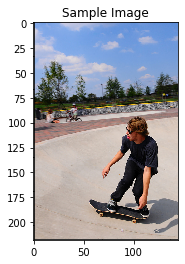

torch.Size([1, 3, 224, 224])
a large white and blue jet . 


In [8]:
from training_incremental_model import Incremental_EncoderCNN, Incremental_DecoderRNN
file_name = 'skateboard.png'
address = os.path.join(os.getcwd(),'images',file_name)
orig_image, input_image = fetch_image(address)
generate_caption(input_image.reshape(1,3,224,224).to('cuda'))